### Summary

> Data Cleaning:
1. Drop columns Zip, State and street
2. Delete the data point with Unknown type
3. Delete data points with 0 in beds, baths or sq__ft
4. Delete data points with over 5000 sq__ft

> Data Wrangling:
1. Extract street type from street
2. Transform street types with frequency 1 into 'others'
3. Transform cities ouside Sacramento into 'others'

> Exploratory Analysis:
1. In Sacramento city, the expensive houses are mainly located on the northwest side and the center of the city. there are still some on the east side and southeast side. However, for houses outside of Sacramento, the distribution of expensive houses is more sparse
2. The overall price is much higher on May 15 than other dates. For the other dates, there are still some expensive houses sold but most of them are not that expensive.
3. Housing is quite different for Sacramento and otheres. Houses are generally larger than 750 sq__ft but many houses are between 500 and 750 in Sacramento. Also, most of houses are cheaper than 400,000 while there are many houses have prices between 400,000 and 800,000 in other cities. Another thing is that in Sacramento, there are much more houses under 200,000 than other cities.
4. The overall housing price is cheaper in Sacramento than other cities in all kinds of streets. Especially for PL, the average price increases by around 250,000 and those most expensive houses (over 800,000) are all located in other cities

In [239]:
import numpy as np
import pandas as pd

from ggplot import *

### Import data

In [240]:
data = pd.read_csv('sacramento_real_estate_transactions_Clean.csv')

In [241]:
data.head()

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [242]:
data.shape

(984, 13)

In [243]:
# Summary statistics
data.describe()

,Unnamed: 0,zip,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,491.785569,95750.611789,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,284.554324,85.176913,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,0.000000,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,245.750000,95660.000000,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,491.500000,95762.000000,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376009
75%,738.250000,95828.000000,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,984.000000,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


### Exploratory Analysis & Data Wrangling

#### Univariate Analaysis

In [244]:
# State
data.state.value_counts()

CA    984
Name: state, dtype: int64

In [245]:
# City
data.city.value_counts()

SACRAMENTO         438
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
CAMERON PARK         9
FAIR OAKS            9
AUBURN               5
WILTON               5
ELVERTA              4
GOLD RIVER           4
RANCHO MURIETA       3
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
EL DORADO            2
LOOMIS               2
MEADOW VISTA         1
SLOUGHHOUSE          1
WALNUT GROVE         1
PENRYN               1
MATHER               1
COOL                 1
SHINGLE SPRINGS      1
FORESTHILL           1
DIAMOND SPRINGS      1
GARDEN VALLEY        1
GREENWOOD            1
Name: city, dtype: int64

In [246]:
# Sale_date
data.sale_date.value_counts()

Mon May 19 00:00:00 EDT 2008    268
Fri May 16 00:00:00 EDT 2008    263
Tue May 20 00:00:00 EDT 2008    177
Wed May 21 00:00:00 EDT 2008    158
Thu May 15 00:00:00 EDT 2008    118
Name: sale_date, dtype: int64

In [247]:
# Type
data.type.value_counts()

Residential     917
Condo            53
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [280]:
data.query('type=="Unkown"')

,Unnamed: 0,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
756,757,6007 MARYBELLE LN,SHINGLE SPRINGS,95682,CA,0,0,0,Unkown,Fri May 16 00:00:00 EDT 2008,275000,38.64347,-120.888183


In [282]:
# Delete the data point with Unknown type
data = data.query('type!="Unkown"')

#### Delete Zip, State and Unnamed

In [283]:
data_new = data.drop(['zip', 'state'], axis=1).iloc[:,1:]

In [284]:
data_new.head()

,street,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [285]:
def extract_road(x):
    '''
    Extract street type from each address
    '''
    x_ls = x.split(' ')
    
    if 'Unit' in x_ls:
        x_road = x_ls[-3]
    elif x_ls[-1].isdigit():
        x_road = x_ls[-2]
    else:
        x_road = x_ls[-1]
        
    return x_road

In [286]:
# Extract street type and create a new feature
streets = data_new.street.apply(extract_road)
data_new['street_type'] = streets

In [287]:
# delete street
data_new = data_new.iloc[:,1:]

In [288]:
data_new.head()

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type
0,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST
1,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT
2,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST
3,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY
4,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR


#### Check the distribution of numerical features

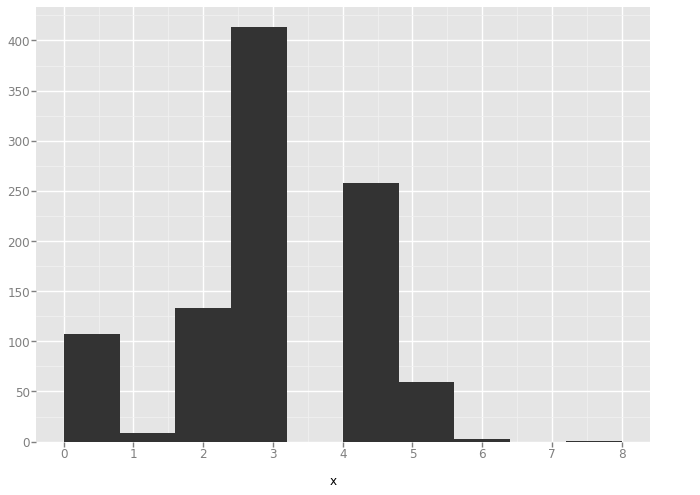

<ggplot: (48192351)>

In [289]:
# Beds
qplot(data_new.beds)

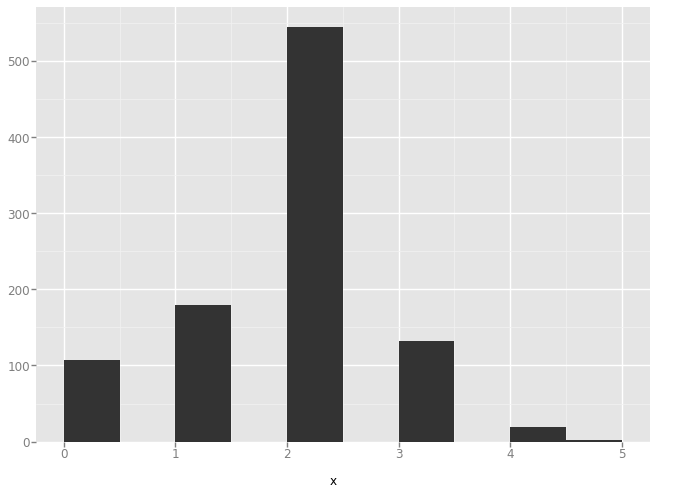

<ggplot: (48482792)>

In [290]:
# Baths
qplot(data_new.baths)

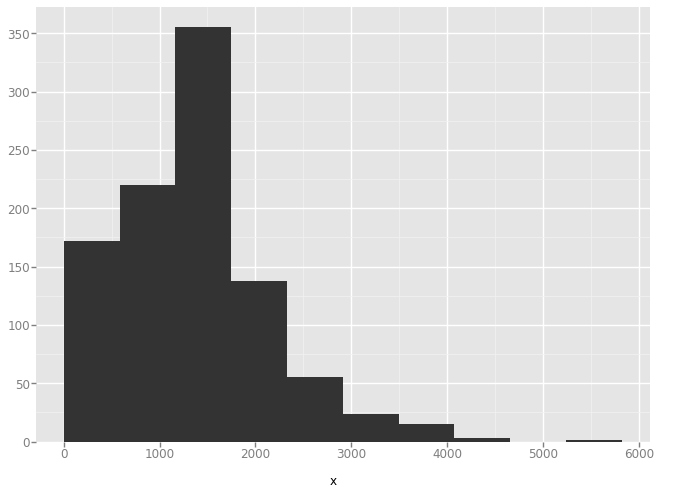

<ggplot: (48050517)>

In [291]:
# sq__ft
qplot(data_new.sq__ft)

There are many 0s in the data in the three features, but this doesn't make sense. These data points should be seen as outliers

In [292]:
# Delete those data points with 0 in the three features
data_new = data_new.query('beds != 0 or baths != 0').query('sq__ft != 0')

also, there is one data point with sq__ft over 5000

In [293]:
data_new.query('sq__ft>5000')

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type
865,SLOUGHHOUSE,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337,DR


this data point doesn't really make sense because the sq__ft is the largest but the price is the lowest. this may be an outlier

In [294]:
# Delete the outlier
data_new = data_new.query('sq__ft<5000')

In [295]:
data_new.shape

(812, 10)

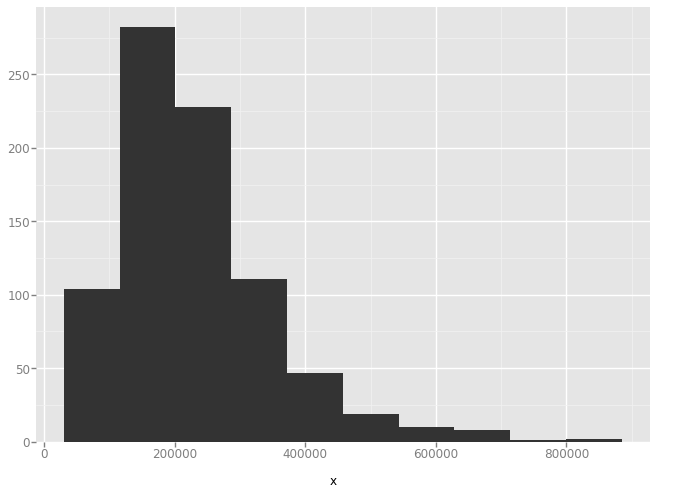

<ggplot: (49181967)>

In [296]:
# Price
qplot(data_new.price)

In [297]:
data_new.query('price>800000')

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type
334,LOOMIS,4,4,1624,Residential,Tue May 20 00:00:00 EDT 2008,839000,38.813337,-121.133348,DR
863,WILTON,4,3,4400,Residential,Fri May 16 00:00:00 EDT 2008,884790,38.415298,-121.194858,CT


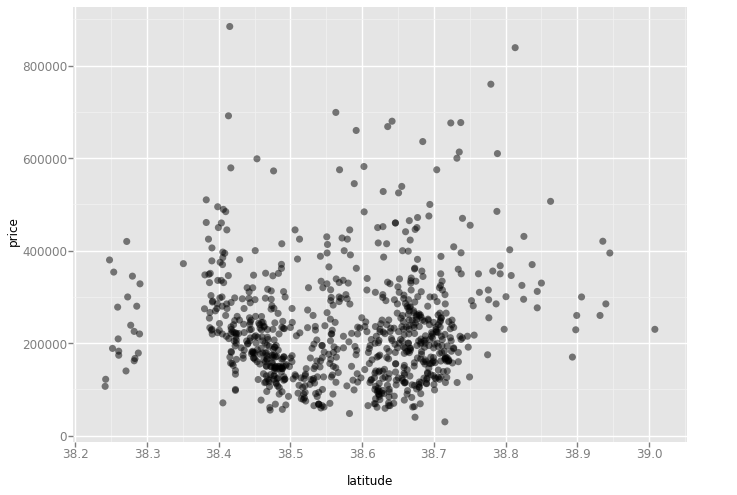

<ggplot: (49092952)>

In [298]:
# Latitude vs Price
ggplot(aes(x='latitude', y='price'), data=data_new) +\
    geom_point(alpha=0.5, size=50)

From the scatter plot, there are two clusters of houses mainly, around latitude 38.4 and 38.7

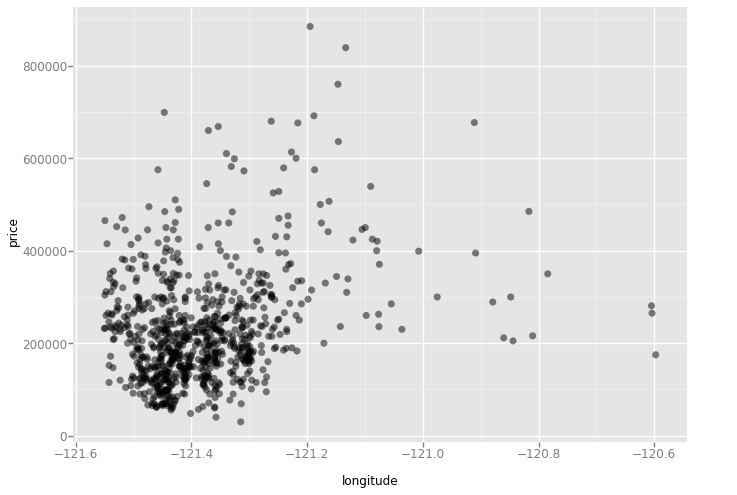

<ggplot: (49445959)>

In [299]:
ggplot(aes(x='longitude', y='price'), data=data_new) +\
    geom_point(alpha=0.5, size=50)

Houses are mainly located around longitude -121.4 and there is a slight increasing trend but still some houses are relatively cheap when longtitude increases 

In [300]:
def sacram(x):
    '''
    Transform other cities into Others
    '''
    if x == 'SACRAMENTO':
        return x
    else:
        return 'others'
    
data_new['city_bi'] = data_new.city.apply(sacram)

In [301]:
data_new.head()

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type,city_bi
0,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST,SACRAMENTO
1,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT,SACRAMENTO
2,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST,SACRAMENTO
3,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY,SACRAMENTO
4,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR,SACRAMENTO


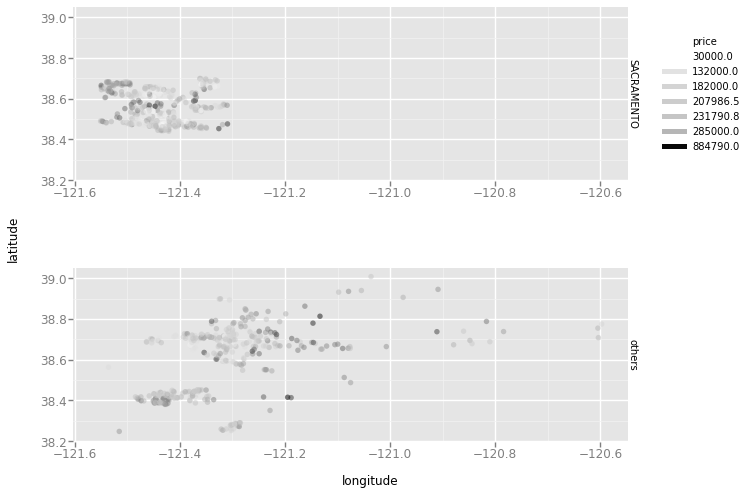

<ggplot: (48044011)>

In [302]:
# Price in Latitude, Longitude for city
ggplot(aes(x='longitude', y='latitude', color='price'), data=data_new) +\
    geom_point(alpha=0.5,size=30) +\
    facet_grid('city_bi') +\
    scale_color_gradient(low = "white", high = "black")

From the scatter plots above we can see that, in Sacramento city, the expensive houses are mainly located on the northwest side and the center of the city. there are still some on the east side and southeast side.
However, for houses outside of Sacramento, the distribution of expensive houses is more sparse

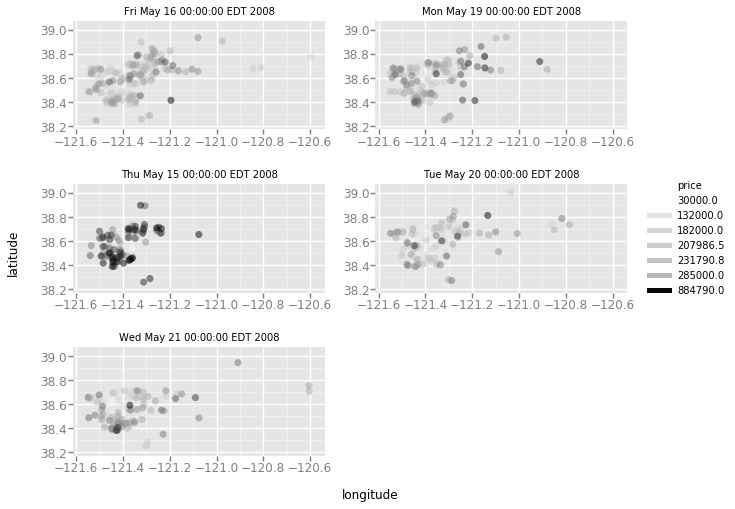

<ggplot: (49671312)>

In [303]:
# Price in Latitude, Longitude for sale date
ggplot(aes(x='longitude', y='latitude', color='price'), data=data_new) +\
    geom_point(alpha=0.5,size=50) +\
    facet_wrap('sale_date') +\
    scale_color_gradient(low = "white", high = "black")

From the scatter plots in each date, the overall price is much higher on May 15 than other dates. For the other dates, there are still some expensive houses sold but most of them are not that expensive.

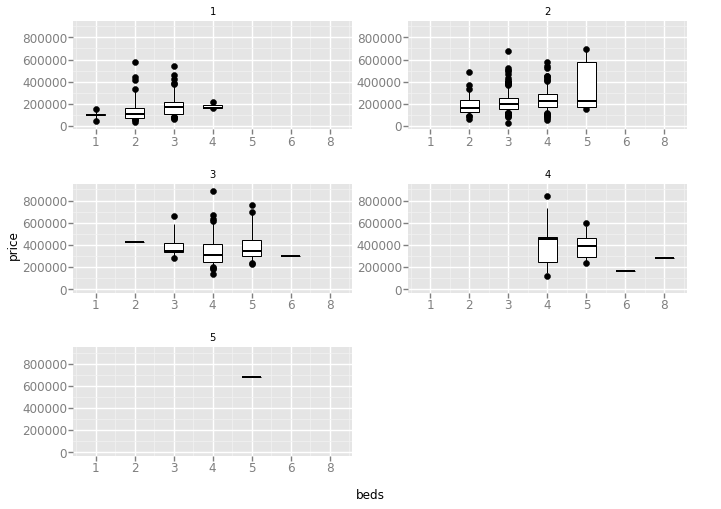

<ggplot: (45096950)>

In [304]:
# Price in beds, baths
ggplot(aes(x='beds', y='price'), data=data_new) +\
    geom_boxplot() +\
    facet_wrap('baths') +\
    xlab('beds') +\
    scale_color_gradient(low = "white", high = "black")

From the boxplots above, the overall price is higher when there are more baths and beds. This makes sense because these houses should be larger. Also, most of houses have less than 5 beds and those houses with over 5 beds are pretty cheap.


In [305]:
data_new.query('baths==5')

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type,city_bi
332,FAIR OAKS,5,5,2846,Residential,Tue May 20 00:00:00 EDT 2008,680000,38.64167,-121.262099,ST,others


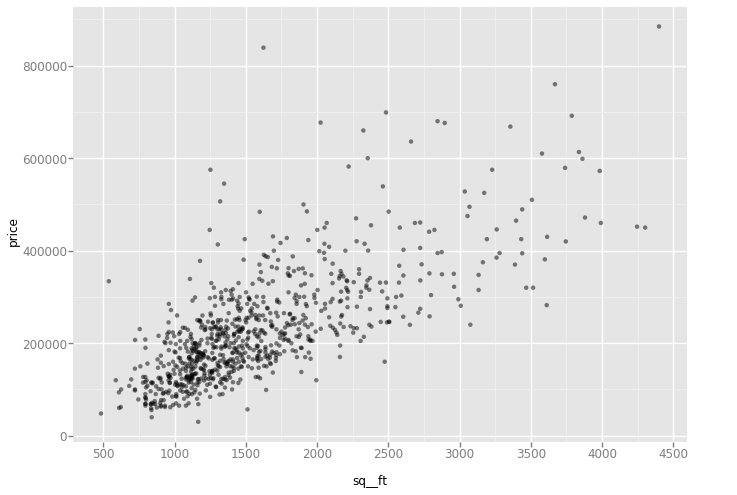

<ggplot: (51676525)>

In [306]:
# sq__ft vs price 
ggplot(aes(x='sq__ft', y='price'), data=data_new) +\
    geom_point(alpha=0.5)

There is a clear increasing trend for the relationship between sq__ft and price

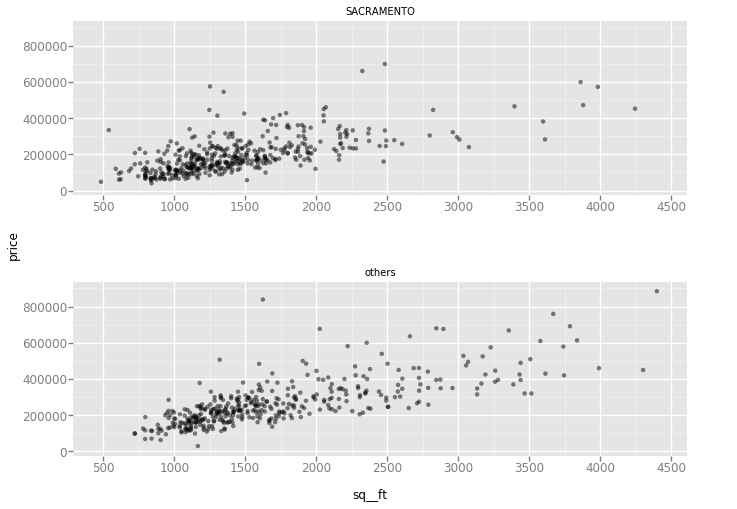

<ggplot: (51939490)>

In [307]:
# sq__ft vs price in different city
ggplot(aes(x='sq__ft', y='price'), data=data_new) +\
    geom_point(alpha=0.5) +\
    facet_wrap('city_bi')
    

Housing is quite different for Sacramento and otheres. Houses are generally larger than 750 sq__ft but many houses are between 500 and 750 in Sacramento. Also, most of houses are cheaper than 400,000 while there are many houses have prices between 400,000 and 800,000 in other cities. Another thing is that in Sacramento, there are much more houses under 200,000 than other cities.

In [308]:
data_new.head()

,city,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_type,city_bi
0,SACRAMENTO,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST,SACRAMENTO
1,SACRAMENTO,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT,SACRAMENTO
2,SACRAMENTO,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST,SACRAMENTO
3,SACRAMENTO,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY,SACRAMENTO
4,SACRAMENTO,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR,SACRAMENTO


In [309]:
# Transform street types with frequency 1 into others
street_count = data_new.street_type.value_counts()
others = street_count[street_count == 1].keys().tolist()

def other_transform(x):
    if x in others:
        return 'others'
    else:
        return x
data_new['street_t'] = data_new.street_type.apply(other_transform)

In [310]:
data_new.street_t.value_counts()

WAY       281
DR        141
CT        102
AVE        70
ST         68
CIR        67
LN         32
RD         21
BLVD        9
others      7
PL          7
PKWY        7
Name: street_t, dtype: int64

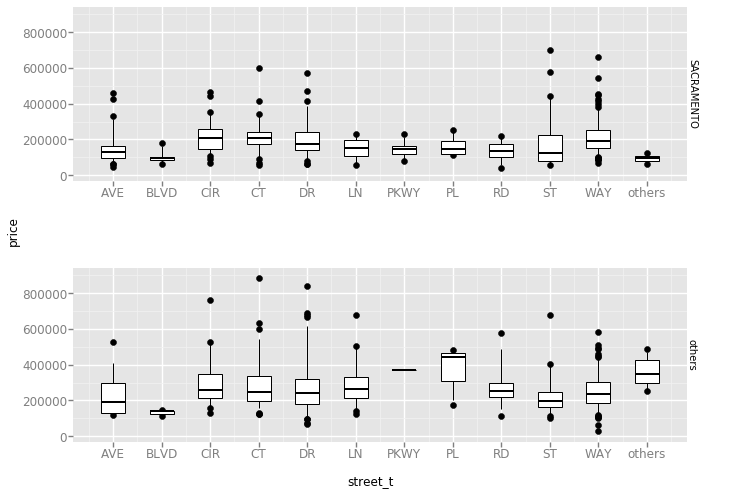

<ggplot: (52219084)>

In [311]:
# Street type vs price
ggplot(aes(x='street_t', y='price'), data=data_new) +\
    geom_boxplot() +\
    facet_grid('city_bi')


The overall housing price is cheaper in Sacramento than other cities in all kinds of streets. Especially for PL, the average price increases by around 250,000 and those most expensive houses (over 800,000) are all located in other cities

In [316]:
class DataPreprossing():
    def __init__(self, fileName):
        self.fileName = fileName
        self.others = []
        
    def extract_road(self, x):
        '''
        Extract street type from each address
        '''
        x_ls = x.split(' ')

        if 'Unit' in x_ls:
            x_road = x_ls[-3]
        elif x_ls[-1].isdigit():
            x_road = x_ls[-2]
        else:
            x_road = x_ls[-1]

        return x_road

    def sacram(self, x):
        '''
        Transform other cities into Others
        '''
        if x == 'SACRAMENTO':
            return x
        else:
            return 'others'
        
    def other_transform(self, x):
        '''
        Transform street types with frequency 1 into others
        '''
        if x in self.others:
            return 'others'
        else:
            return x

    def data_wrangling(self):
        # Delete the data point with Unknown type
        data = pd.read_csv(self.fileName)
        data = data.query('type!="Unkown"')

        # Drop columns Zip, State
        data = data.iloc[:,1:]
        data = data.drop(['zip', 'state'], axis=1)

        # Extract street type and create a new feature
        streets = data.street.apply(self.extract_road)
        data['street_type'] = streets

        # delete street
        data = data.iloc[:,1:]

        # Delete those data points with 0 in the three features
        data = data.query('beds != 0 or baths != 0').query('sq__ft != 0')

        # Delete the data point with sq__ft over 5000
        data = data.query('sq__ft<5000')

        # Transform cities ouside Sacramento into 'others' 
        data['city_bi'] = data.city.apply(self.sacram)

        # Transform street types with frequency 1 into others
        street_count = data.street_type.value_counts()
        self.others = street_count[street_count == 1].keys().tolist()

        data['street_t'] = data.street_type.apply(self.other_transform)
        data = data.drop('street_type', axis=1)

        return data
    
   

In [317]:
data_process = DataPreprossing('sacramento_real_estate_transactions_Clean.csv')
data_new = data_process.data_wrangling()
data_new.to_csv('data_new.csv', index=False)

C:\Users\42914\Anaconda2\lib\site-packages\ipykernel\__main__.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\42914\Anaconda2\lib\site-packages\ipykernel\__main__.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
